In [1]:
import tensorflow as tf
import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [2]:
N = 400
T = 4000
dtVal = 0.25

In [3]:
# def init_float(shape, name):
# #     return tf.Variable(tf.random_normal(shape, stddev=0.01), name=name)
#     return tf.Variable(tf.zeros(shape), name=name)


# def variable_summaries(var, name):
#     """Attach a lot of summaries to a Tensor."""
#     with tf.name_scope('summaries'):
#         mean = tf.reduce_mean(var)
#         tf.scalar_summary('mean/' + name, mean)
#         with tf.name_scope('stddev'):
#             stddev = tf.sqrt(tf.reduce_sum(tf.square(var - mean)))
#         tf.scalar_summary('sttdev/' + name, stddev)
#         tf.scalar_summary('max/' + name, tf.reduce_max(var))
#         tf.scalar_summary('min/' + name, tf.reduce_min(var))
#         tf.histogram_summary(name, var)


In [4]:
# with tf.device(DEVICE):
#     dt = tf.placeholder(tf.float32, shape=(), name='dt')
#     tauv = tf.placeholder(tf.float32, shape=(), name='tauv')
#     sim_index = tf.placeholder(tf.int32, shape=(), name='sim_index')

#     scaling = 1 / (1/(2*2/dtVal))**0.5 * 70

#     # Create variables for simulation state
#     u = init_float([N,1], 'u')
#     v = init_float([N,1], 'v')
#     t = tf.Variable(0, dtype='float32')
#     ind = tf.Variable(0, dtype='float32')
    
#     LowSp = init_float([N,1], 'bursting')
#     vv = init_float([N,1], 'spiking')
    
#     vmean = tf.Variable(0, dtype='float32')
#     umean = tf.Variable(0, dtype='float32')
#     vvmean = tf.Variable(0, dtype='float32')
#     imean = tf.Variable(0, dtype='float32')
#     gammamean = tf.Variable(0, dtype='float32')
    

#     # currents
#     iBack = init_float([N,1], 'iBack')
#     iEff = init_float([N,1], 'iEff')
#     iGap = init_float([N,1], 'iGap')
#     iChem = init_float([N,1], 'iChem')
    
#     # synaptics connection
#     conn = np.zeros([N, N], dtype='float32')
#     sG = 10
#     nbInCluster = int(N/2)
#     for i in range(N):
#         for j in range(N):
#             conn[i][j] = ((i<(nbInCluster + sG)) & (j<(nbInCluster + sG)) ) \
#             or ((i>=(nbInCluster - sG)) & (j>=(nbInCluster - sG)) )
#     allowedConnections = tf.Variable(conn)
#     nbOfGaps = np.sum(conn)
    
#     g0 = 7 /nbOfGaps**0.5
#     wGap_init = np.ones([N, N], dtype=np.float32)*g0
#     wII_init = np.ones([N, N], dtype=np.float32)*500/N/dtVal
    
#     wGap = tf.Variable(wGap_init * conn)
#     WII = tf.Variable(wII_init)

#     FACT = 1
#     ratio = 15
#     A_LTD  = 1e-0*4.7e-6 * FACT * N
#     A_LTP = ratio * A_LTD
    
#     TImean = 130.0
#     TImean_simul = tf.ones([N,1], dtype='float32')*TImean
#     TImean_init =  tf.concat(0,[tf.ones([int(N/2),1]), tf.zeros([N-int(N/2),1])]) * TImean
    
#     spikes = init_float([T,N], "spikes")

In [5]:
# with tf.device(DEVICE):   
#     with tf.name_scope('Currents'):
#         # Discretized PDE update rules
#         iChem_ = iChem + dt/5 * (-iChem + tf.matmul(WII,tf.to_float(vv)))

#         # current
#         iBack_ = iBack + dt/2 * (-iBack + tf.random_normal((N,1), mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None))  
#         iEff_ = iBack_ * scaling + tf.select(tf.greater(tf.ones([N,1])*t,300), TImean_simul, TImean_init)
#         iGap_ = tf.matmul(wGap,v) - tf.mul(tf.reshape(tf.reduce_sum(wGap, 0), (N,1)),v)

#         I_ = iGap_ + iChem_ + iEff_
    
#     # IZHIKEVICH
#     with tf.name_scope('Izhikevich'):
#         ind_ = ind + 1
#         # voltage
#         v_ = v + dt / tauv * (tf.mul((v + 60), (v +50)) - 20 * u + 8 * I_)
#         # adaptation
#         u_ = u + dt * 0.044 * (v_ + 55 - u)
#         # spikes
#         vv_ = tf.to_float(tf.greater(v_,25.0))
#         # reset
#         v_ = tf.mul(vv_,-40.0) + tf.mul((1-vv_),v_)
#         u_ = u_ + tf.mul(vv_,(50.0))

#     # bursting
#     with tf.name_scope('bursting'):
#         LowSp_ = LowSp + dt/10.0*(vv_ * 10.0 / dt - LowSp)
#         p = tf.to_float(tf.greater(LowSp_,1.3))
    
#     # plasticity
#     with tf.name_scope('plasticity'):
#         A = tf.matmul(p,tf.ones([1,N]))
#         dwLTD_ = A_LTD*(A+tf.transpose(A))

#         # dwLTP_ = A_LTP * tf.mul(tf.to_float(vv_),(g0 - wGap))

#         B = tf.matmul(vv_, tf.ones([1,N]))
#         dwLTP_ = A_LTP*(tf.mul(tf.ones([N,N]) - 1/g0 * wGap, B+tf.transpose(B)))
#         # dwLTD_ = A_LTD * p
#         dwGap_ = dt * (dwLTP_ - dwLTD_)
#         wGap_ = tf.mul(tf.clip_by_value(wGap+dwGap_, clip_value_min=0, clip_value_max=10**10), allowedConnections)



#     # monitoring
#     with tf.name_scope('Monitoring'):
#         vmean_ = tf.reduce_mean(v_)
#         umean_ = tf.reduce_mean(u_)
#         imean_ = tf.reduce_mean(I_)
#         vvmean_ = tf.reduce_sum(tf.to_float(vv_))
#         gammamean_ = tf.reduce_mean(wGap_)


#     with tf.name_scope('Raster_Plot'):
#         spike_update = tf.scatter_update(spikes, sim_index,tf.reshape((vv_), (N,)))
    

#     # Operation to update the state
#     step = tf.group(
#         v.assign(v_),
#         vv.assign(vv_),
#         u.assign(u_),
#         iBack.assign(iBack_),
#         iEff.assign(iChem_),
#         LowSp.assign(LowSp_),
#         wGap.assign(wGap_),
#         vmean.assign(vmean_),
#         umean.assign(umean_),
#         imean.assign(imean_),
#         vvmean.assign(vvmean_),
# #         gammamean.assign(gammamean_),
#         )

# # with tf.name_scope('Summaries'):
# #     variable_summaries(v_, 'Monitoring/v')
# #     variable_summaries(u_, 'u')
# #     variable_summaries(I_, 'I')
# #     variable_summaries(vv_, 'vv')
# #     variable_summaries(wGap_, 'gamma')
# #     w_hist = tf.histogram_summary("weights", wGap_)



In [6]:
# # Initialize state to initial conditions
# # merged = tf.merge_all_summaries()
# # train_writer = tf.train.SummaryWriter(FLAGS.summaries_dir + '/train', sess.graph)

# # sess = tf.Session()
# sess.run(tf.initialize_all_variables())
# # with sess.as_default():
# if 1:
#     vm=[]
#     um=[]
#     vvm=[]
#     im=[]
#     gamma=[]
#     t0 = time.time()
#     for i in range(T):
#         # Step simulation
#         sess.run([step], feed_dict={dt: dtVal, tauv: 15, sim_index: i})
#         feed = {dt: dtVal, tauv: 15,sim_index: i}
#         sess.run(spike_update, feed_dict=feed)
#         vvm.append(vvmean.eval())
#         # Visualize every 50 steps
#         if i % 10 == 0:
#             pass
# #             summary = sess.run(merged, feed_dict={dt: dtVal, tauv: 15})
# #             train_writer.add_summary(summary, i)
#             clear_output(wait=True)
#             DisplayArray(wGap.eval(), rng=[0, 2*g0])
#             vm.append(vmean.eval())
#             um.append(umean.eval())
#             im.append(imean.eval())
#             gamma.append(gammamean.eval())
# #         if i % 100 == 0:
# #             run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
# #             run_metadata = tf.RunMetadata()
# #             train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
        
# print('%.2f'%(time.time()-t0))
# # sess.close()

In [8]:
from functionsTF import *
runTFSimul(N,T)

/Users/GP1514/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


NameError: name 'dtVal' is not defined

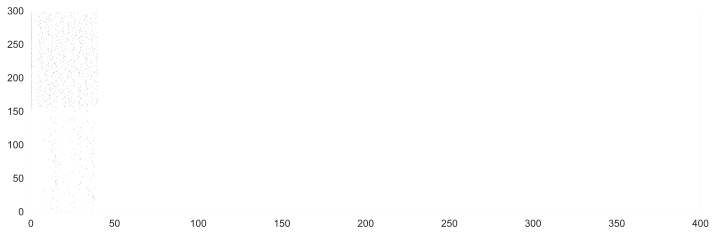

In [9]:
sp =tf.convert_to_tensor(spikes).eval()
plt.figure(figsize=(12,4))
extent=[0,400,0,300]
plt.imshow(sp.transpose(), extent=extent, aspect=0.3*(extent[1] - extent[0]) / (
            extent[3] - extent[2]))

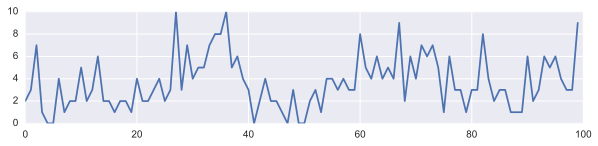

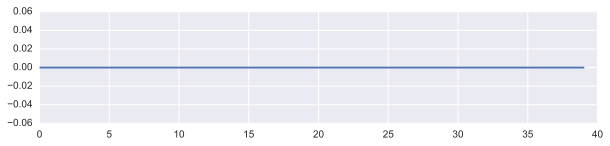

In [10]:
plt.figure(figsize=(10,2))
plt.plot(vvm[-100:])
plt.figure(figsize=(10,2))
plt.plot(np.array(gamma)*N**2)

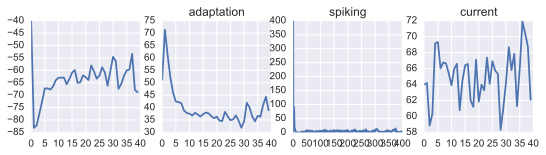

In [18]:
fig = plt.figure(figsize=(9,2))
ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)

ax0.plot(vm)

ax1.plot(um)
ax1.set_title('adaptation')

ax2.plot(vvm)
ax2.set_title('spiking')

ax3.plot(im)
ax3.set_title('current')

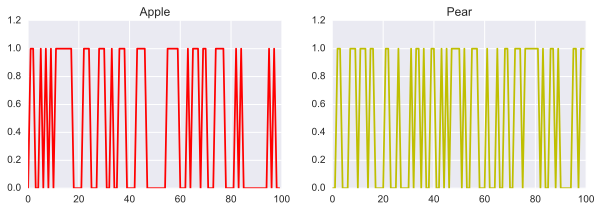

In [58]:
T=100
np.random.seed(2)
apple = np.random.randint(0,2, size=T)
np.random.seed(3)
pear = np.random.randint(0,2, size=T)


fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(apple, c='r')
ax.set_ylim([0,1.2])
ax.set_title('Apple')

ax2.plot(pear, c='y')
ax2.set_ylim([0,1.2])
ax2.set_title('Pear')